# Introduction to convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is practice of writing algorithm which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

# Get the data

The images we're working with are from the food101 dataset(101 different class of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with a smaller dataset, so we can experiment quickly and figure what works (or better yet doesn't work) before scalling up.

In [3]:
# Get the data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

'wget' is not recognized as an internal or external command,
operable program or batch file.


# Inspect the data (become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project... this means usually visualizing many samples of your data.

In [9]:
!dir pizza_steak

 Volume in drive C has no label.
 Volume Serial Number is 2E47-68DC

 Directory of C:\Tensorflow\TensorFlow-Computer-Vision-and-Convolution-Neural-Network-CNN\pizza_steak

23/02/2022  08:51    <DIR>          .
23/02/2022  08:51    <DIR>          ..
23/02/2022  08:51    <DIR>          test
23/02/2022  08:51    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  12.118.974.464 bytes free


In [17]:
!dir pizza_steak\train\steak

 Volume in drive C has no label.
 Volume Serial Number is 2E47-68DC

 Directory of C:\Tensorflow\TensorFlow-Computer-Vision-and-Convolution-Neural-Network-CNN\pizza_steak\train\steak

23/02/2022  08:51    <DIR>          .
23/02/2022  08:51    <DIR>          ..
23/02/2022  08:52            36.185 1000205.jpg
23/02/2022  08:52            34.497 100135.jpg
23/02/2022  08:52           116.802 101312.jpg
23/02/2022  08:52            56.754 1021458.jpg
23/02/2022  08:52            34.143 1032846.jpg
23/02/2022  08:52            24.688 10380.jpg
23/02/2022  08:52            37.134 1049459.jpg
23/02/2022  08:52            49.841 1053665.jpg
23/02/2022  08:52            59.983 1068516.jpg
23/02/2022  08:52            28.996 1068975.jpg
23/02/2022  08:52            29.525 1081258.jpg
23/02/2022  08:52            49.577 1090122.jpg
23/02/2022  08:52            59.976 1093966.jpg
23/02/2022  08:52            60.253 1098844.jpg
23/02/2022  08:52            69.843 1100074.jpg
23/02/2022  08:52      

23/02/2022  08:52            51.791 2232310.jpg
23/02/2022  08:52            57.562 2233395.jpg
23/02/2022  08:52            77.949 2238681.jpg
23/02/2022  08:52            53.494 2238802.jpg
23/02/2022  08:52            50.701 2254705.jpg
23/02/2022  08:52            47.254 225990.jpg
23/02/2022  08:52            50.283 2260231.jpg
23/02/2022  08:52            62.571 2268692.jpg
23/02/2022  08:52            61.510 2271133.jpg
23/02/2022  08:52            41.440 227576.jpg
23/02/2022  08:52            66.319 2283057.jpg
23/02/2022  08:52            66.622 2286639.jpg
23/02/2022  08:52            66.986 2287136.jpg
23/02/2022  08:52            49.842 2291292.jpg
23/02/2022  08:52            43.692 229323.jpg
23/02/2022  08:52            63.391 2300534.jpg
23/02/2022  08:52            46.749 2300845.jpg
23/02/2022  08:52            37.276 231296.jpg
23/02/2022  08:52            74.520 2315295.jpg
23/02/2022  08:52            43.935 2323132.jpg
23/02/2022  08:52            40.188 2324994.

23/02/2022  08:52            51.084 389739.jpg
23/02/2022  08:52            32.549 3916407.jpg
23/02/2022  08:52            49.556 393349.jpg
23/02/2022  08:52            59.367 393494.jpg
23/02/2022  08:52           106.457 398288.jpg
23/02/2022  08:52            91.369 40094.jpg
23/02/2022  08:52            51.298 401094.jpg
23/02/2022  08:52            46.523 401144.jpg
23/02/2022  08:52            46.493 401651.jpg
23/02/2022  08:52            42.046 405173.jpg
23/02/2022  08:52            54.881 405794.jpg
23/02/2022  08:52            85.511 40762.jpg
23/02/2022  08:52            63.466 413325.jpg
23/02/2022  08:52            39.356 417368.jpg
23/02/2022  08:52            85.213 4176.jpg
23/02/2022  08:52            51.579 42125.jpg
23/02/2022  08:52            56.490 421476.jpg
23/02/2022  08:52            32.909 421561.jpg
23/02/2022  08:52            61.226 438871.jpg
23/02/2022  08:52            66.412 43924.jpg
23/02/2022  08:52            45.727 440188.jpg
23/02/2022  08:52 

In [24]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [25]:
# Another way to find out how many images are in file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first lets get the class names programmatically

In [26]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Cretaed list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [33]:
# Lets visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (We'll view images from here)
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" +  random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape : {img.shape}") #show the shape of the image
    
    return img

['233964.jpg']
Image shape : (382, 512, 3)


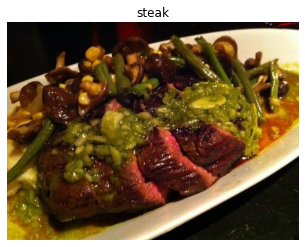

In [35]:
# View a random  image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak"
                       )

In [38]:
img.dtype

dtype('uint8')

In [39]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[ 11,   9,  14],
        [ 11,   9,  14],
        [ 10,   8,  13],
        ...,
        [ 56,   9,  19],
        [ 54,   8,  18],
        [ 53,   7,  17]],

       [[  9,   7,  12],
        [  9,   7,  12],
        [  9,   7,  12],
        ...,
        [ 68,  18,  29],
        [ 66,  19,  29],
        [ 66,  19,  29]],

       [[ 10,   8,  11],
        [ 10,   8,  11],
        [ 10,   8,  11],
        ...,
        [ 71,  17,  31],
        [ 68,  16,  29],
        [ 68,  16,  29]],

       ...,

       [[197, 162,   0],
        [203, 168,   4],
        [206, 173,   8],
        ...,
        [  3,   8,   2],
        [  3,   8,   2],
        [  4,   9,   3]],

       [[197, 162,   0],
        [202, 167,   3],
        [203, 170,   5],
        ...,
        [  4,   9,   3],
        [  4,   9,   5],
        [  4,   9,   5]],

       [[197, 162,   0],
        [201, 166,   2],
        [201, 168,   3],
        ...,
        [  6,  11,   

In [40]:
# View the image shape
img.shape # returns width, height, color channels

(382, 512, 3)

In [41]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.04313725, 0.03529412, 0.05490196],
        [0.04313725, 0.03529412, 0.05490196],
        [0.03921569, 0.03137255, 0.05098039],
        ...,
        [0.21960784, 0.03529412, 0.0745098 ],
        [0.21176471, 0.03137255, 0.07058824],
        [0.20784314, 0.02745098, 0.06666667]],

       [[0.03529412, 0.02745098, 0.04705882],
        [0.03529412, 0.02745098, 0.04705882],
        [0.03529412, 0.02745098, 0.04705882],
        ...,
        [0.26666667, 0.07058824, 0.11372549],
        [0.25882353, 0.0745098 , 0.11372549],
        [0.25882353, 0.0745098 , 0.11372549]],

       [[0.03921569, 0.03137255, 0.04313725],
        [0.03921569, 0.03137255, 0.04313725],
        [0.03921569, 0.03137255, 0.04313725],
        ...,
        [0.27843137, 0.06666667, 0.12156863],
        [0.26666667, 0.0627451 , 0.11372549],
        [0.26666667, 0.0627451 , 0.11372549]],

       ...,

       [[0.77254902, 0.63529412, 0.        ],
        [0.79607843, 0.65882353, 0.01568627],
        [0.80784314, 0

# An end-to-end example

Lets build a convolution neural network to find patterns in our images, more specifically we a need to way to:
   * Load our images 
   * Preprocess our images
   * Build a CNN to find patterns in our images
   * Compile our CNN
   * Fit the CNN to our trining data
    

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                              )

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                              )

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=10,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
               )

# Fit the model 
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                      )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.6364 - accuracy: 0.6467 - val_loss: 0.5404 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 51s 1s/step - loss: 0.5191 - accuracy: 0.7400 - val_loss: 0.4155 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 50s 1s/step - loss: 0.4267 - accuracy: 0.8027 - val_loss: 0.3228 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 51s 1s/step - loss: 0.3823 - accuracy: 0.8393 - val_loss: 0.3076 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 51s 1s/step - loss: 0.3574 - accuracy: 0.8540 - val_loss: 0.2933 - val_accuracy: 0.8840


In [46]:
len(train_data)

47

**Note:** If the aove cell is taking longer than ~ 10 seconds per epochs, make sure you're using a GPU by going to runtime -> Change runtime type --> Hardware accelerator --> GPU (you may have to rerun some cells above)

In [48]:
# Get a model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 10)        910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 10)        910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 810)              

**Practice/exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/

# Using a model same as before

Lets replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.08208&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [50]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
               )

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=(len(train_data)),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                       )

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 0.9056 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 250ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 15s 327ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 14s 308ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 14s 295ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [51]:
# Get the model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [52]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above but lets step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
               )

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=(len(train_data)),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                       )

Epoch 1/5
47/47 [==============================] - 20s 419ms/step - loss: 3.9006 - accuracy: 0.6380 - val_loss: 0.6599 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 15s 315ms/step - loss: 0.8679 - accuracy: 0.7127 - val_loss: 1.4612 - val_accuracy: 0.5860
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.8889 - accuracy: 0.7040 - val_loss: 0.4529 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 18s 380ms/step - loss: 0.7215 - accuracy: 0.6987 - val_loss: 0.6237 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 18s 389ms/step - loss: 0.4981 - accuracy: 0.7980 - val_loss: 0.4493 - val_accuracy: 0.7800


In [53]:
# Get a model summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** You can think of trainable parameters as **pattern a model can learn from data**. Intuitively, you might think more is a better. And in lot of cases, it is. But in this case, the differences here is the two different style of model we're using. whwrw are series of dense a layer has anumber of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **A convolution neural network seeks to short out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different features in an image.

# Binary classification: Lets break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for pur model, the main step here was scalling/normalizing)
3. Created a model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameter and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experimet)

**1. Become one with the data**

['1512347.jpg']
Image shape : (512, 512, 3)
['3324050.jpg']
Image shape : (512, 512, 3)


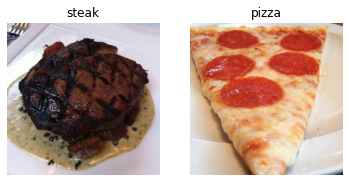

In [54]:
# Fusualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


**2. Preprocess the data (prepare it for a model)**

In [55]:
# Define directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/train/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. rather than look at all ~10,000 image at one time, a model might only look at 32 at a time. It does this for a couple of reason:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32??

Because 32 is good for your health.....

In [58]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [59]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), #Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32 # Size of minibatches to load data info
                                              )

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32
                                              )

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [60]:
# Get sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [61]:
# How many batches are there ?
len(train_data)

47

In [62]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [63]:
images[7].shape

(224, 224, 3)

In [64]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

**3. Create a CNN model (start with a baseline)**

A baseline is a relatively simple model or existing result that you setup when begining a machine experimenting, you try to beat the baseline.

>**Note:** In deep learning, there is almost an infinite amount an architecture you could create. So one of the best way to get started is to start with something simple and see if it works on your data and then introduce complexity as required(e.g. )

In [65]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [70]:
#https://poloclub.github.io/cnn-explainer/

# Create the model (This will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher=more complex model)
           kernel_size=(3, 3), # the size of the sliding window going across an input
           strides=(1, 1), # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
               )



**4. Fit the model**

In [71]:
# Fit the model 
history_4 = model_4.fit(train_data, # this is combinations of labels and sample data 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                       )

Epoch 1/5
47/47 [==============================] - 123s 3s/step - loss: 0.8370 - accuracy: 0.7060 - val_loss: 0.4513 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 134s 3s/step - loss: 0.4207 - accuracy: 0.8200 - val_loss: 0.3069 - val_accuracy: 0.8920
Epoch 3/5
47/47 [==============================] - 103s 2s/step - loss: 0.2770 - accuracy: 0.8973 - val_loss: 0.1419 - val_accuracy: 0.9647
Epoch 4/5
47/47 [==============================] - 95s 2s/step - loss: 0.1388 - accuracy: 0.9527 - val_loss: 0.0891 - val_accuracy: 0.9927
Epoch 5/5
47/47 [==============================] - 95s 2s/step - loss: 0.0532 - accuracy: 0.9893 - val_loss: 0.0162 - val_accuracy: 1.0000


In [72]:
# Check the model summary
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_6 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_4.evaluate(test_data)

47/47 [==============================] - 22s 462ms/step - loss: 0.0162 - accuracy: 1.0000


[0.016167055815458298, 1.0]

**5. Evaluate the model**

It looks like our model is learning something, lets evaluate it.

<AxesSubplot:>

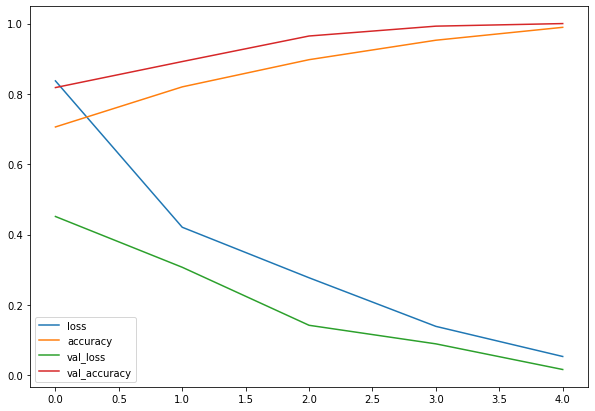

In [74]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [94]:
# Plot the validation and traiing curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) # how many epochs did we run for ?
    
    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend();
    

**Note:** when a models **validation loss starts to increase**, its likely that the model is **overfitting** the train dataset. This means, its learning the patterns in the training dataset too well and thus the model ability to generalize to unseen data will be diminished.

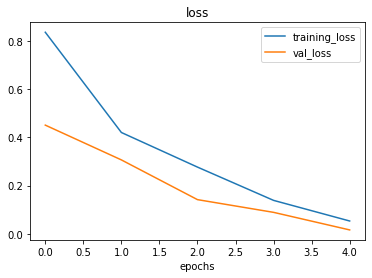

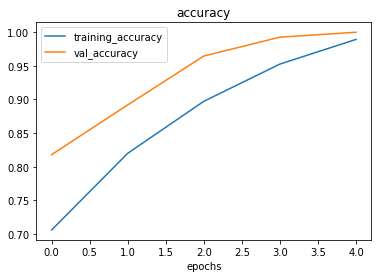

In [95]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (trainign loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**

### 6. Adjust the model parameter

Fitting a machine learning model comes in 3 steps:
1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting

* Increase number of conv layers
* Increase number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as **regularization**

In [102]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [103]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
               )

In [107]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                       )

Epoch 1/5
47/47 [==============================] - 47s 1s/step - loss: 0.5951 - accuracy: 0.6767 - val_loss: 0.4331 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 62s 1s/step - loss: 0.4236 - accuracy: 0.8067 - val_loss: 0.4486 - val_accuracy: 0.7933
Epoch 3/5
47/47 [==============================] - 54s 1s/step - loss: 0.4040 - accuracy: 0.8280 - val_loss: 0.4393 - val_accuracy: 0.8073
Epoch 4/5
47/47 [==============================] - 52s 1s/step - loss: 0.3753 - accuracy: 0.8407 - val_loss: 0.3610 - val_accuracy: 0.8427
Epoch 5/5
47/47 [==============================] - 41s 871ms/step - loss: 0.3588 - accuracy: 0.8440 - val_loss: 0.3304 - val_accuracy: 0.8680


In [110]:
# Get a summary of our model with maxpooling
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6760)             

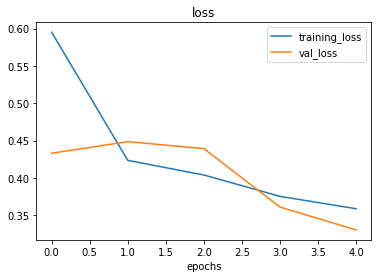

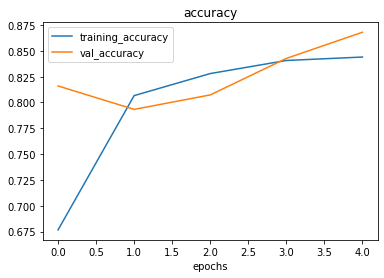

In [111]:
# Plot loss curves
plot_loss_curves(history_5)

# Opening our bag of tricks and finding data augmentation

In [112]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image ?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image 
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, # move your image around on the y-axis
                                             horizontal_flip=True # do you want to flip an image ?
                                            )

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

>**Question:** What is data augmentation ?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of the image, flipping it, cropping it or someting similar.

Lets write some code to visualize data augmentation...

In [114]:
# Import data and augmentation it from directory
print("Augmentation training data : ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstration purpose only

# Create non-augmented train data batches
print("Non-augmented training data : ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data : ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False
                                            )

Augmentation training data : 
Found 1500 images belonging to 2 classes.
Non-augmented training data : 
Found 1500 images belonging to 2 classes.
Non-augmented test data : 
Found 1500 images belonging to 2 classes.


>**Note:** Data augmentation is usually only perfomed on the training data using `ImageDataGenerator` built-in data augmwntation parameters our image are left as they're loaded into the model

Finally, lets visualized some augmented data...

In [115]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note : labels aren't augmented... only data (images)


Showing image number: 1


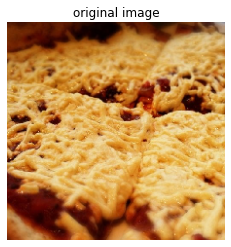

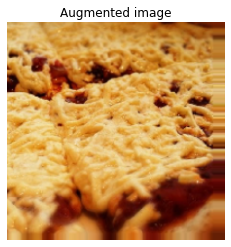

In [123]:
# Show original image and augmented image
import random

random_number = random.randint(0, 32) # our batch size are 32 ...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, lets build a model and see how it learns on augmented data.

In [124]:
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
               )

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                       )

Epoch 1/5
47/47 [==============================] - 79s 2s/step - loss: 0.7129 - accuracy: 0.5513 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.6924 - accuracy: 0.5093 - val_loss: 0.6822 - val_accuracy: 0.6267
Epoch 3/5
47/47 [==============================] - 71s 2s/step - loss: 0.6980 - accuracy: 0.4907 - val_loss: 0.6820 - val_accuracy: 0.5013
Epoch 4/5
47/47 [==============================] - 80s 2s/step - loss: 0.6990 - accuracy: 0.5020 - val_loss: 0.6876 - val_accuracy: 0.5540
Epoch 5/5
47/47 [==============================] - 74s 2s/step - loss: 0.6889 - accuracy: 0.5673 - val_loss: 0.6748 - val_accuracy: 0.5953


In [125]:
# Check the model summary
model_6.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, None, None, 10)    280       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, None, None, 10)    0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, None, None, 10)    910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, None, None, 10)    0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, None, None, 10)    910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, None, None, 10)    0         
_________________________________________________________________
flatten_9 (Flatten)          (None, None)             

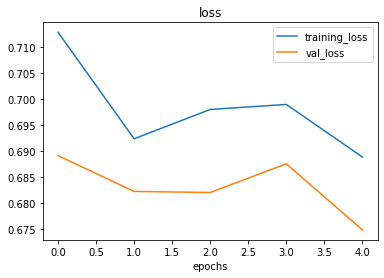

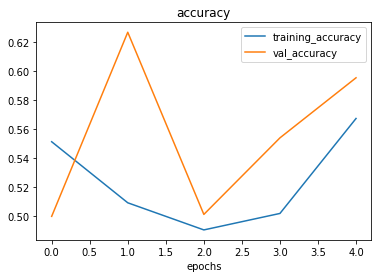

In [126]:
# Check our models training curves
plot_loss_curves(history_6)

Lets shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [127]:
# Import data and augmentation it from directory
print("Augmentation training data : ")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True) # For demonstration purpose only


Augmentation training data : 
Found 1500 images belonging to 2 classes.


In [128]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
               )

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # We're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                       )

Epoch 1/5
47/47 [==============================] - 83s 2s/step - loss: 0.6522 - accuracy: 0.6020 - val_loss: 0.5609 - val_accuracy: 0.7433
Epoch 2/5
47/47 [==============================] - 69s 1s/step - loss: 0.5654 - accuracy: 0.7027 - val_loss: 0.4605 - val_accuracy: 0.7947
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.5194 - accuracy: 0.7440 - val_loss: 0.4353 - val_accuracy: 0.8087
Epoch 4/5
47/47 [==============================] - 75s 2s/step - loss: 0.5178 - accuracy: 0.7407 - val_loss: 0.4253 - val_accuracy: 0.8093
Epoch 5/5
47/47 [==============================] - 77s 2s/step - loss: 0.4872 - accuracy: 0.7660 - val_loss: 0.4111 - val_accuracy: 0.8127


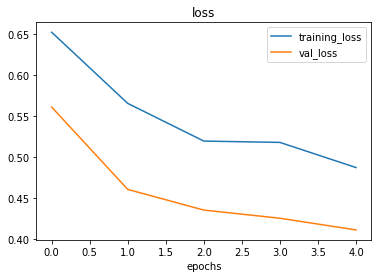

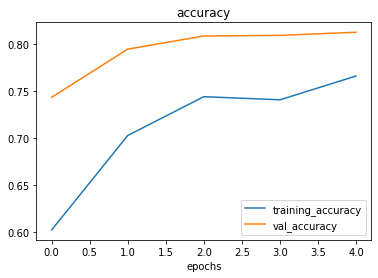

In [129]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during traing, thus enabling it to learn features across a wide array of images(in our case, pizza & steak at the same time instead of just pizza then steak

# 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could to try continue to improve our model:
* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

>**Practice:** Recreate the model on the CNN explainer website (same as model_1) and see how it performs on the augmented shuffled training data.

# Making a prediction with our trained model on our own custom data

In [130]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


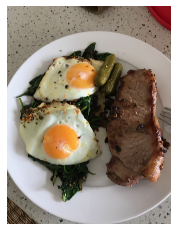

In [142]:
# View our example image
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [143]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, its important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [147]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels). 
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [148]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [150]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.9001778]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the models prediction ?

In [151]:
# We can index the predicted class by rounding the prediction probabilities and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [152]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an images located at filename, makes a prediction with model and plot the image with predicted class as the tittle.
    """
    # Import the target image and preprocessed it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

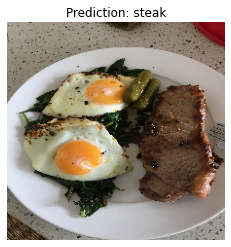

In [153]:
# Test our model on a custom iamage
pred_and_plot(model_7, "03-steak.jpeg")

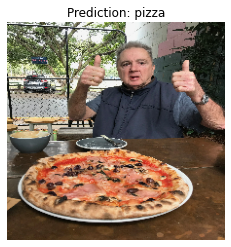

In [154]:
# Test our model on a custom iamage
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for model)
3. Created a model (start with baseline)
4. Fit the model (overfitting it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat our baseline/reduce overfitting)
7. Repeat until satisfied

# 1. Import and become one with data

In [157]:
import zipfile

#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [167]:
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [213]:
# Setup the test and train directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [214]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir_multi)
classes_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(classes_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1113170.jpg']
Image shape : (512, 512, 3)


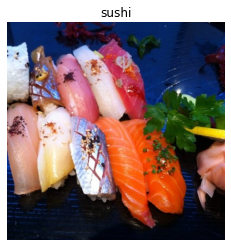

In [215]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(classes_names)
                       )

# 2. Preprocess the data (prepared it for a model)

In [218]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# 3. Create a model (start with baseline)

We've been talking a lot about the `CNN explainer website` how about we just take their model(also on 10 classes) and use it for our problem...?

In [219]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation


#Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # Changed to have 10 output neuron and use the softmax activation function 
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [220]:
model_8.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_8 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 53, 53, 10)      

# 4. Fit the model

In [221]:
# Fit a model
history_8 = model_8.fit(train_data, # Now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                       )

Epoch 1/5
235/235 [==============================] - 631s 3s/step - loss: 2.1077 - accuracy: 0.2357 - val_loss: 1.9097 - val_accuracy: 0.3348
Epoch 2/5
235/235 [==============================] - 561s 2s/step - loss: 1.8118 - accuracy: 0.3769 - val_loss: 1.8555 - val_accuracy: 0.3476
Epoch 3/5
235/235 [==============================] - 513s 2s/step - loss: 1.4230 - accuracy: 0.5253 - val_loss: 2.0049 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 517s 2s/step - loss: 0.8569 - accuracy: 0.7187 - val_loss: 2.4988 - val_accuracy: 0.2888
Epoch 5/5
235/235 [==============================] - 494s 2s/step - loss: 0.3691 - accuracy: 0.8893 - val_loss: 3.6368 - val_accuracy: 0.2668


# 5. Evaluate the model

In [222]:
model_8.evaluate(test_data)

79/79 [==============================] - 44s 558ms/step - loss: 3.6368 - accuracy: 0.2668


[3.636807918548584, 0.2667999863624573]

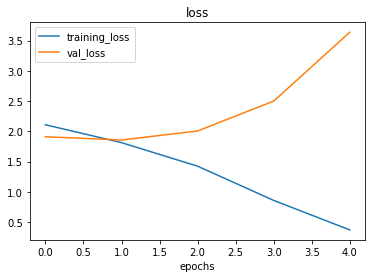

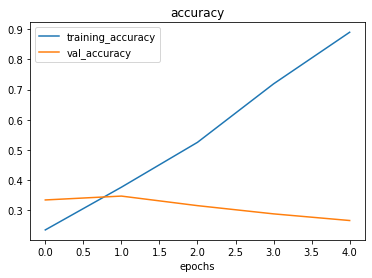

In [223]:
# Check out the models loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curve tell us ?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting greta result on the training data but fails to generalize well to unseen data and performs poorly on the test dataset

#  6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, its clear our model is learning something...

However, its not generalizing well to unseen data (overfitting).

So, lets try and fix overfitting by.....

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simply the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [224]:
# How about we try and simplify the model first ?
# Lets try to remove 2 convolutional layers....

# Create the model
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") 
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [225]:
model_9.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [226]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                       )

Epoch 1/5
235/235 [==============================] - 220s 931ms/step - loss: 2.1373 - accuracy: 0.2427 - val_loss: 1.9455 - val_accuracy: 0.3076
Epoch 2/5
235/235 [==============================] - 224s 951ms/step - loss: 1.7945 - accuracy: 0.3808 - val_loss: 1.8661 - val_accuracy: 0.3408
Epoch 3/5
235/235 [==============================] - 226s 963ms/step - loss: 1.4426 - accuracy: 0.5276 - val_loss: 1.9689 - val_accuracy: 0.3272
Epoch 4/5
235/235 [==============================] - 217s 923ms/step - loss: 0.9720 - accuracy: 0.6891 - val_loss: 2.2470 - val_accuracy: 0.3120
Epoch 5/5
235/235 [==============================] - 199s 845ms/step - loss: 0.5745 - accuracy: 0.8280 - val_loss: 2.5534 - val_accuracy: 0.3212


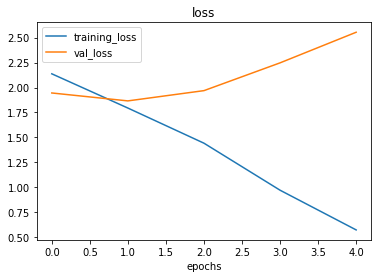

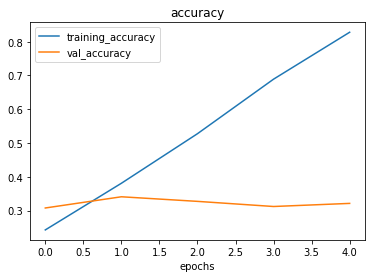

In [279]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

Looks like our simplifying the model experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation...???

### Trying to reduce overfitting with data augmentation

Lets try and improve our models result by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closser)
* Improve validation accuracy

In [230]:
# Create an augmentation data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True
                                            )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [231]:
# Lets create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [232]:
model_10.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_8 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 53, 53, 10)      

In [233]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                       )

Epoch 1/5
235/235 [==============================] - 499s 2s/step - loss: 2.2489 - accuracy: 0.1471 - val_loss: 2.1117 - val_accuracy: 0.2200
Epoch 2/5
235/235 [==============================] - 449s 2s/step - loss: 2.1145 - accuracy: 0.2337 - val_loss: 1.9585 - val_accuracy: 0.2968
Epoch 3/5
235/235 [==============================] - 448s 2s/step - loss: 2.0170 - accuracy: 0.2947 - val_loss: 1.8421 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 462s 2s/step - loss: 1.9588 - accuracy: 0.3153 - val_loss: 1.8163 - val_accuracy: 0.3648
Epoch 5/5
235/235 [==============================] - 496s 2s/step - loss: 1.9464 - accuracy: 0.3257 - val_loss: 1.7715 - val_accuracy: 0.3972


In [234]:
model_8.evaluate(test_data)

79/79 [==============================] - 39s 488ms/step - loss: 3.6368 - accuracy: 0.2668


[3.6368088722229004, 0.2667999863624573]

In [235]:
model_10.evaluate(test_data)

79/79 [==============================] - 38s 480ms/step - loss: 1.7715 - accuracy: 0.3972


[1.771484136581421, 0.39719998836517334]

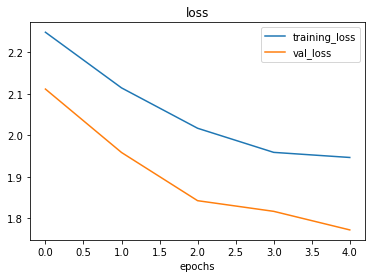

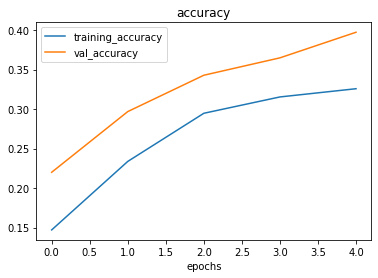

In [236]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

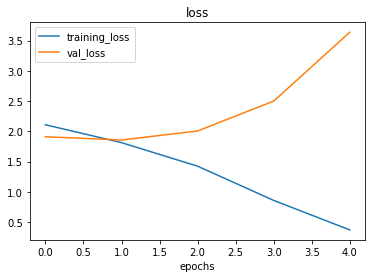

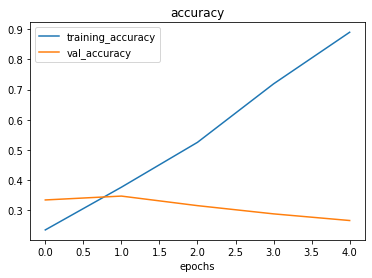

In [237]:
plot_loss_curves(history_8)

That looks much better, the loss curves are much closer to each other than baseline model and they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

# 7. Repeat until satisfied

We could keep going here... containally trying to bring our loss curves closser together and trying to improve the validation/test accuracy.

How ?

By runninf lots of experiments, namely:
- restructuring our model architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Lets use our trained model to make some prediction on our own custom images...

In [245]:
# Reconfig pred and plot funtion to work with multi-class image

def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an images located at filename, makes a prediction with model and plot the image with predicted class as the tittle.
    """
    # Import the target image and preprocessed it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Add in logic for multi-class & get pred_class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

In [262]:
model_8.evaluate(test_data)

79/79 [==============================] - 44s 546ms/step - loss: 3.6368 - accuracy: 0.2668


[3.6368086338043213, 0.2667999863624573]

In [263]:
model_9.evaluate(test_data)

79/79 [==============================] - 32s 403ms/step - loss: 2.5534 - accuracy: 0.3212


[2.553385019302368, 0.32120001316070557]

In [264]:
model_10.evaluate(test_data)

79/79 [==============================] - 43s 532ms/step - loss: 1.7715 - accuracy: 0.3972


[1.7714840173721313, 0.39719998836517334]

In [286]:
classes_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

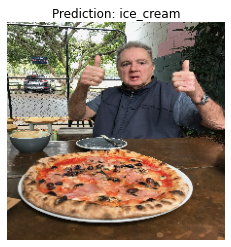

In [287]:
# Make a prediction using model 10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=classes_names
             )


Looks like our model didn't perform very well on our custom images but this because int only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data. 

# Saving and load our model 

In [288]:
# Save our model
model_10 .save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10\assets


In [291]:
# Load in a trained model dan evaluate it 
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 52s 658ms/step - loss: 1.7715 - accuracy: 0.3972


[1.771484613418579, 0.39719998836517334]

In [292]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 72s 911ms/step - loss: 1.7715 - accuracy: 0.3972


[1.771484375, 0.39719998836517334]

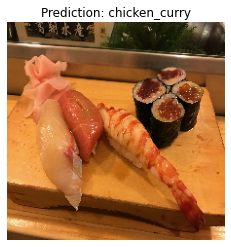

In [297]:
pred_and_plot(model=loaded_model_10,
              filename="03-sushi.jpeg",
              class_names=classes_names
             )